In [79]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [80]:
#importando dados

In [81]:
ativo = wb.get_data_yahoo('AUDJPY=X', start=2000)
ativo = ativo.drop(columns='Volume')
ativo = ativo.drop(columns='Adj Close')
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2003-12-01,79.739998,78.820000,79.338997,79.370003,NaN,NaN,NaN,NaN
2003-12-02,79.923103,79.272598,79.370003,79.610001,NaN,NaN,NaN,NaN
2003-12-03,79.812798,79.190002,79.589996,79.730003,NaN,NaN,NaN,NaN
2003-12-04,79.739998,79.110001,79.730003,79.570000,NaN,NaN,NaN,NaN
2003-12-05,79.650002,79.095200,79.589996,79.199997,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-31,79.785004,79.280403,79.290001,79.285004,78.622800,78.22730,76.406369,74.190770
2021-01-01,81.414497,73.273003,73.273003,78.377998,78.606600,78.28485,76.425379,74.251115
2021-01-04,79.602997,78.998001,79.602997,79.607002,78.718401,78.39360,76.455129,74.317355


In [82]:
#ativo = round(ativo*1000)

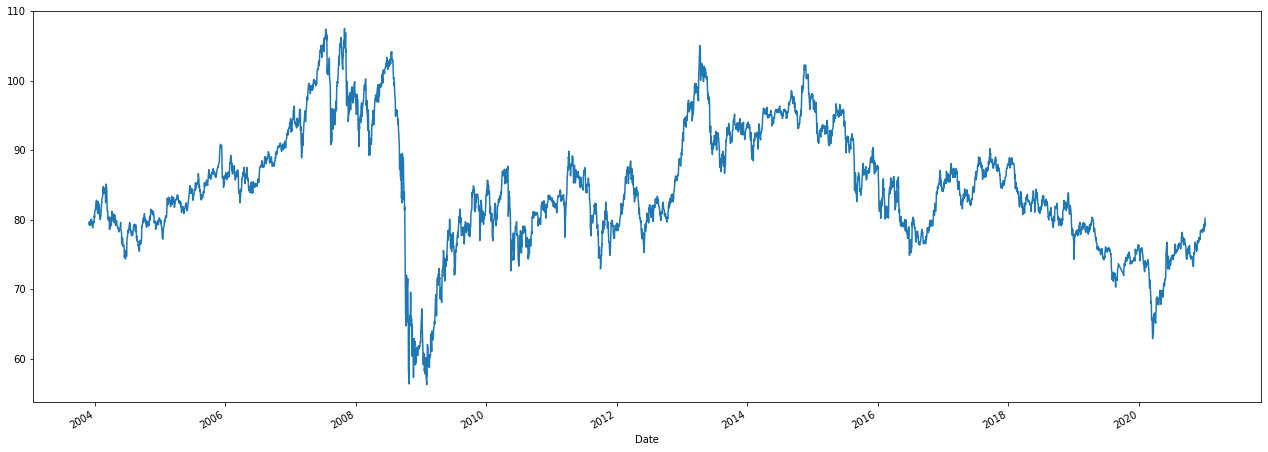

In [83]:
ativo['Close'].plot(figsize=(22,8))

In [84]:
resultado = []
for i in range(0, len(ativo)):
  if ativo['Close'][i] > ativo['Open'][i]:
    resultado.append(1)
  else:
    resultado.append(0)

In [85]:
resultado.pop(0)
resultado.append('Espera')
ativo['Resultado'] = resultado

In [86]:
ativo = ativo.dropna()
ativo['MM10'] = ativo['Close'] - ativo['MM10']
ativo['MM20'] = ativo['Close'] - ativo['MM20']
ativo['MM100'] = ativo['Close'] - ativo['MM100']
ativo['MM200'] = ativo['Close'] - ativo['MM200']
#ativo['Close'] = ativo['Close'] / ativo['Open']
#ativo['Low'] = ativo['Low'] / ativo['Open']
#ativo['High'] = ativo['High'] / ativo['Open']
#ativo['Open'] = ativo['Open'] / ativo['Open']
#ativo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [87]:
previsores = ativo.iloc[:len(ativo)-1,0:8]
classe = ativo.iloc[:len(ativo)-1,8]
classe = classe.astype('int')

In [88]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [89]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [91]:
print(precisao)
print(matriz)

0.5291338582677165
[[166 148]
 [151 170]]


In [92]:
# Conclusão: 52,9%
#Péssimo